In [14]:
import numpy as np
import pandas as pd

In [15]:
np.random.seed(228)
n_features = 2
n_objects = 1000

w_true = np.random.normal(size=(n_features, )) # пусть реальная зависимость целевой перменной от признаков лежит в w_true
w_true

array([ 1.27131471, -2.32041245])

In [16]:
np.random.seed(228)
job_cnts = np.random.randint(1, 7, n_objects) # Количество работ у каждого человека - случайное равновероятное число от 1 до 7
average_durations = [abs(np.random.normal(3, 1, job_cnt)).mean() for job_cnt in job_cnts] # предположим, что средняя 
                                                         # продолжительность работы на одном месте - 3 года. Тогда пусть время
                                                         # работы распределено нормально с матожиданием 3 и дисперсией 1
target = abs(np.array(average_durations) * w_true[0] + np.array(job_cnts) * w_true[1] + np.random.normal(0, 0.7, n_objects))
# для каждого человека сгенерируем правильные ответы путем перемножения вектора признаков на вектор истинной зависимости
# и добавлением случайного нормального вектора

In [17]:
data = pd.DataFrame(data={'average_duration' : average_durations, 'job_cnt' : job_cnts})
data.head()

,average_duration,job_cnt
0,2.464201,6
1,2.973589,1
2,3.945518,4
3,2.313994,2
4,2.752659,5


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, 
                                                    test_size=0.2, random_state=10) # делим выборки на тестовую и тренировочную

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, lr.predict(X_test))

1.932175834418314

In [21]:
y_test.mean()

4.8512862313078005

In [22]:
lr.intercept_

-0.7722948518213899

In [23]:
for name, coef in zip(list(X_test.columns), lr.coef_):
    print(f'{name}: {coef}')

average_duration: -0.2522398275321671
job_cnt: 1.8315474297265577


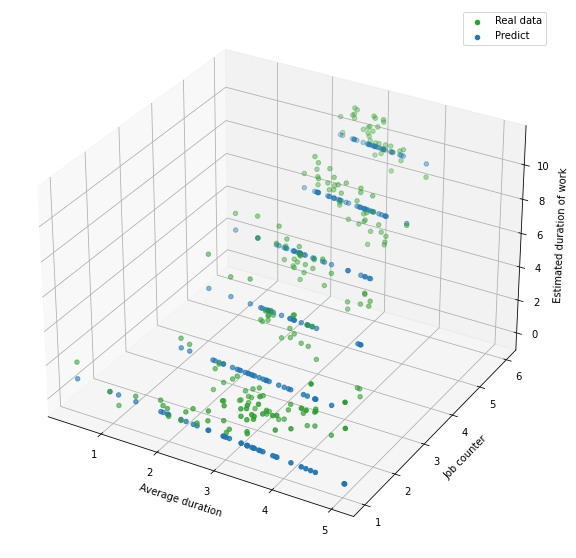

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_test['average_duration'], X_test['job_cnt'], y_test, color='#2ca02c', label='Real data')
ax.scatter(X_test['average_duration'], X_test['job_cnt'], lr.predict(X_test), color='#1f77b4', label='Predict')

plt.xlabel('Average duration')
plt.ylabel('Job counter')
ax.set_zlabel('Estimated duration of work')
ax.legend()
plt.show()

In [26]:
total = X_test.assign(Real_data=y_test, Predict=lr.predict(X_test))
total.tail()

,average_duration,job_cnt,Real_data,Predict
274,2.796416,2,1.086587,2.185433
192,3.426764,5,8.436930,7.521076
398,2.854747,5,7.539415,7.665361
450,1.664151,2,3.039694,2.471035
520,2.743074,5,8.176306,7.693530
